In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

### 1 - Ejercicio

Simular N=100 muestras de una V.A X con distribución N(0,1)
- Encontrar la curtosis y oblicuidad
- Encontrar el IQR
- Estimar el desvio estandar usando el rango de mediciones simuladas
- Trazar el diagrama de BOX

In [2]:
mu, sigma = 0, 1 # media y desvio estandar
n = 100  # nº muestras
X = np.random.normal(mu, sigma, n)

In [6]:
# Curtosis
print("Curtosis:", kurtosis(X))

Curtosis: -0.10037310299268976


In [3]:
# Oblicuidad
print("Oblicuidad:", skew(X))

Oblicuidad: 0.10161644378757455


In [13]:
# IQR
q3 = np.quantile(X, 0.75)
q1 = np.quantile(X, 0.25)
iqr = q3-q1
print("IQR:", iqr)

IQR: 1.3741435235329298


In [18]:
rango = np.quantile(X, 0.975) - np.quantile(X, 0.025)
std_estimado = rango / 4
std_aritmetico = X.std()
print("Desvio estandar estimado", std_estimado, "vs", std_aritmetico)

Desvio estandar estimado 0.8508382330496844 vs 0.9904349712148675


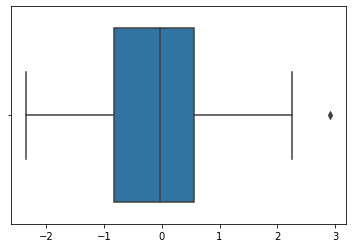

In [26]:
sns.boxplot(x=X)
plt.show()

### 2 - Ejercicio

Simular N=100 muestras de una V.A X con distribución exponencial lamda=1
- Encontrar la curtosis y oblicuidad
- Encontrar el IQR
- Estimar el desvio estandar usando el rango de mediciones simuladas
- Trazar el diagrama de BOX

In [34]:
n = 100  # nº muestras
X2 = np.random.exponential(1, n)

In [35]:
# Curtosis
print("Curtosis:", kurtosis(X2))

Curtosis: 13.072145435157399


In [36]:
# Oblicuidad
print("Oblicuidad:", skew(X2))

Oblicuidad: 2.7497436255401446


In [37]:
# IQR
q3 = np.quantile(X2, 0.75)
q1 = np.quantile(X2, 0.25)
iqr = q3-q1
print("IQR:", iqr)

IQR: 1.1573539569640976


In [38]:
rango = np.quantile(X2, 0.975) - np.quantile(X2, 0.025)
std_estimado = rango / 4
std_aritmetico = X2.std()
print("Desvio estandar estimado", std_estimado, "vs", std_aritmetico)

Desvio estandar estimado 0.7399415843642688 vs 1.0222699159388478


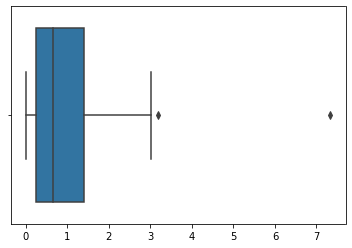

In [39]:
sns.boxplot(x=X2)
plt.show()

### 3 - Ejercicio

In [36]:
# Amazon stock price (13-Abril -> 13-Mayo)
# Referencia --> https://www.investing.com/equities/amazon-com-inc-historical-data
stock_price = np.array([3400, 3333, 3379, 3399, 3372, 3334, 3362, 3309, 3340, 3409, 3417, 3458, 3471, 3467, 3386, 3311, 3270, 3306, 3291, 3190, 3223, 3151, 3161])
# Las fechas se toman desde el 13 de Abril como el dia 1
stock_day = np.arange(1, len(stock_price)+1)

Promedio: 3336.478260869565
Mediana: 3340.0
Desvio: 89.47667637081034


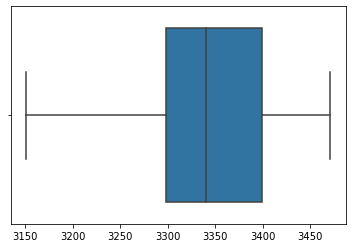

In [21]:
print("Promedio:", stock_price.mean())
print("Mediana:", np.median(stock_price))
print("Desvio:", stock_price.std())
sns.boxplot(x=stock_price)
plt.show()

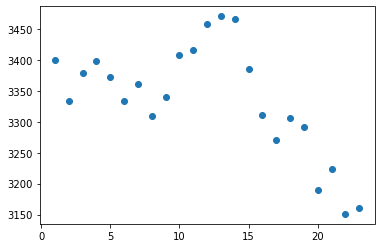

In [38]:
plt.scatter(stock_day, stock_price)
plt.show()

#### Obtener los datos dentro del intervalo de 95% de confianza

In [31]:
# Utilizando los quantiles
upper = np.quantile(stock_price, 0.975)
lower = np.quantile(stock_price, 0.025)
print(upper)
print(lower)

3468.8
3156.5


In [41]:
# Datos recordatos
mask = (stock_price > lower) & (stock_price < upper)
stock_price_filter = stock_price[mask]
stock_day_filter = stock_day[mask]
print("Cantidad de valores filtrados:", len(stock_price) - len(stock_price_filter))
# Media recortada
precio_promedio = stock_price_filter.mean()
precio_promedio

Cantidad de valores filtrados: 2


3338.904761904762

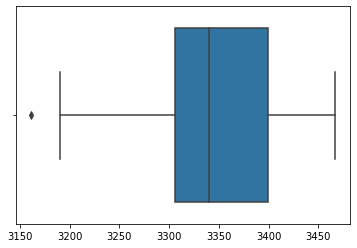

In [33]:
sns.boxplot(x=stock_price_filter)
plt.show()

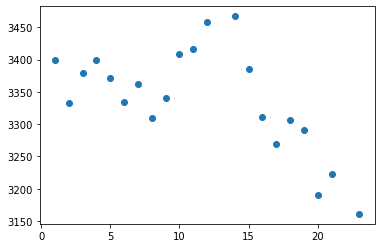

In [40]:
plt.scatter(stock_day_filter, stock_price_filter)
plt.show()

#### Regresion lineal

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = stock_day_filter.reshape(-1, 1)
y = stock_price_filter

lr.fit(X, y)
print(f"Pendiente (W1): {lr.coef_[0]:.2f}")
print(f"Ordenada al origen (W0): {lr.intercept_:.2f}")

Pendiente (W1): -7.35
Ordenada al origen (W0): 3423.30


In [48]:
# Calcular el valor de la accion un mes adelante (22 dias)
X_target = stock_day_filter[-1] + 22
y_hat = lr.predict(np.array([[X_target]]))[0]
y_hat

3092.3733824303

In [50]:
ganancia = ((y_hat / precio_promedio) * 100) - 100
ganancia

-7.383600223859702

In [52]:
if ganancia >= 2:
    print(f"Comprar! La accion valdra un {ganancia:.2f}% más en un mes")
else:
    print(f"No compres! La accion valdra un {ganancia:.2f}% en un mes")

No compres! La accion valdra un -7.38% en un mes


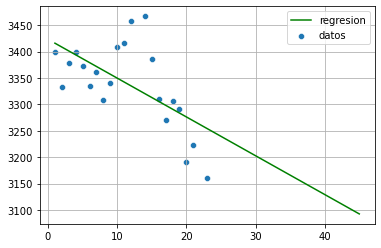

In [56]:
X2 = [stock_day_filter[0], X_target]
y2 = [lr.predict(np.array([[stock_day_filter[0]]]))[0], y_hat]

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=X[:, 0], y=y, label='datos', ax=ax)
sns.lineplot(x=X2, y=y2, label='regresion', color='g', ax=ax)
ax.legend()
ax.grid('dashed')
plt.show()